In [1]:
from uproot_io import Events, View
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import time

print("Running...")
toc = time.perf_counter()
#ALL SETUP

thr_std=0.2
n_events=9310


E = Events("CheatedRecoFile_1.root")


view_u = View(E, "u")
view_v = View(E, "v")
view_w = View(E, "w")


u_x = view_u.x
u_z = view_u.z
u_adc = view_u.adc
u_truevtx_z = view_u.true_vtx_z
u_truevtx_x = view_u.true_vtx_x


v_x = view_v.x
v_z = view_v.z
v_adc = view_v.adc
v_truevtx_z = view_v.true_vtx_z
v_truevtx_x = view_v.true_vtx_x

w_x = view_w.x
w_z = view_w.z
w_adc = view_w.adc
w_truevtx_z = view_w.true_vtx_z
w_truevtx_x = view_w.true_vtx_x

tic = time.perf_counter()
print("All data loaded in", tic-toc, "seconds")

Running...
All data loaded in 152.674383 seconds


In [2]:
def AoI(plane, event_number, thresholding=True, no_std=thr_std, ordering=True):
    #given plane and event number, extract required information and threshold if required
    if plane=="u":
        AoI_x = u_x[event_number]
        AoI_z = u_z[event_number]
        AoI_adc = u_adc[event_number]
        AoI_truevtxz = u_truevtx_z[event_number]
        AoI_truevtxx = u_truevtx_x[event_number]
    elif plane=="v":
        AoI_x = v_x[event_number]
        AoI_z = v_z[event_number]
        AoI_adc = v_adc[event_number]
        AoI_truevtxz = v_truevtx_z[event_number]
        AoI_truevtxx = v_truevtx_x[event_number]
    elif plane=="w":
        AoI_x = w_x[event_number]
        AoI_z = w_z[event_number]
        AoI_adc = w_adc[event_number]   
        AoI_truevtxz = w_truevtx_z[event_number]
        AoI_truevtxx = w_truevtx_x[event_number]
    else:
        print("PLane not u,v,w")
        
    if thresholding:
        mean = np.average(AoI_adc)
        std = np.std(AoI_adc)
        AoI_x = AoI_x[(mean-no_std*std<AoI_adc)]
        AoI_z = AoI_z[(mean-no_std*std<AoI_adc)]
        AoI_adc = AoI_adc[(mean-no_std*std<AoI_adc)]
        
    if ordering:
        order = np.argsort(AoI_z)
        AoI_z = np.take_along_axis(AoI_z, order, axis=0)
        AoI_x = np.take_along_axis(AoI_x, order, axis=0)
        AoI_adc = np.take_along_axis(AoI_adc, order, axis=0)
        
    AoI = [AoI_z, AoI_x, AoI_adc]
    return AoI, (AoI_truevtxz,AoI_truevtxx)
#AoI, true = AoI("u", 657)
#AoI, true = AoI("u", 20)

In [7]:
Aoi, true = AoI('u', 20)

In [3]:
from tqdm import tqdm

In [4]:
def least_z(AoI):
    z, x, adc = AoI
    return z[0], x[0]

In [8]:
def least_z_scores(AoI, dependence=np.exp, plot=False):
    z, x, adc = AoI
    scores = dependence(z[0]-z)
    if plot:
        plt.plot(z, x, 'o')
        plt.show()
        plt.plot(z, scores, 'ro')
        plt.show()
    return scores
least_z_scores(Aoi)

array([1.0000000e+00, 6.2708396e-01, 3.9323431e-01, 2.4656084e-01,
       1.5461436e-01, 9.6956186e-02, 6.0799669e-02, 3.8126498e-02,
       2.3905599e-02, 1.4990819e-02, 9.4005018e-03, 5.8949040e-03,
       3.6966000e-03, 2.3177958e-03, 1.4534525e-03, 9.1143680e-04,
       5.7154743e-04, 3.5840823e-04, 2.2472463e-04, 1.4092121e-04,
       8.8369437e-05, 5.5415057e-05, 3.4749897e-05, 2.1788443e-05,
       1.3663183e-05, 8.5679640e-06, 5.3728327e-06, 3.3688061e-06,
       2.1125243e-06, 1.3247302e-06, 8.3071706e-07, 5.2092935e-07,
       3.2662660e-07, 2.0482230e-07, 1.2844079e-07, 8.0543160e-08,
       5.0507325e-08], dtype=float32)

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:52<00:00,  4.04s/it]


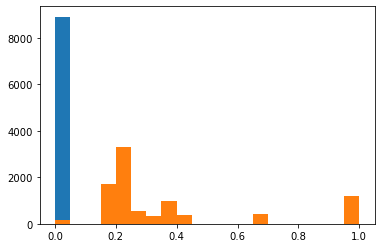

((array([8.905e+03, 1.100e+01, 5.000e+00, 1.100e+01, 1.800e+01, 2.400e+01,
         4.000e+00, 8.700e+01, 7.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
         1.000e+00, 2.200e+01, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
         0.000e+00, 2.500e+01]),
  array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
         0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
  <BarContainer object of 20 artists>),
 (array([1.830e+02, 3.000e+00, 5.000e+00, 1.732e+03, 3.306e+03, 5.390e+02,
         3.260e+02, 9.730e+02, 3.980e+02, 2.000e+00, 1.000e+00, 2.000e+00,
         2.000e+00, 4.360e+02, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
         1.000e+00, 1.215e+03]),
  array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
         0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
  <BarContainer object of 20 artists>))

In [12]:
def pdf(events, algorithm_scores, Length, plot=False):
    signal = []
    noise = []
    for ev in tqdm(events):
        Aoi, true = AoI('u', ev, thresholding=True, no_std=thr_std, ordering=True)
        z, x, adc = Aoi
        L = len(z)
        scores = algorithm_scores(Aoi)
        for i in range(L):
            r =( (z[i]-z)**2 + (x[i]-x)**2 )**0.5
            sig_miniscore = 0
            noi_miniscore = 0
            for j in range(L):
                if r[j]>Length:
                    noi_miniscore += scores[j]
                else:
                    sig_miniscore += scores[j]
            signal.append(sig_miniscore)
            noise.append(noi_miniscore)

    #normalise to between 0 and 1
    signal = np.array(signal)/np.amax(signal)
    noise = np.array(noise)/np.amax(noise)

    #give as fraction of hits
    no_in_sig = len(signal)
    no_in_noi = len(noise)
    
    if plot:
        x = plt.hist(signal,20)
        y = plt.hist(noise,20)
        plt.show()
    return x, y

events = [2,59,347,785,1000,2345,3234,6571,7980,8000,8500,8764,9005]


pdf(events, least_z_scores, 12, plot=True)
#3,5,11
